By Nitish Adhikari

Email id :nitishbuzzpro@gmail.com, +91-9650740295
    
Linkedin : https://www.linkedin.com/in/nitish-adhikari-6b2350248

Problem Statement:-
IT team has limited capacity and therefore, they are interested in solution that
could help them prioritize important incidents.
Every incident is manually evaluated and labeled with Impact value which
provide us information about incident importance. IT team wants to solve
incidents with high impact as soon as possible. Impact value may be updated
during troubleshooting process.

In [118]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [119]:
# Loading the dataset
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?


In [120]:
# Checking for missing values
print(df.isnull().sum())

Unnamed: 0            0
ID                    0
ID_status             0
active                0
count_reassign        0
count_opening         0
count_updated         0
ID_caller             0
opened_by             0
opened_time           0
Created_by            0
created_at            0
updated_by            0
updated_at            0
type_contact          0
location              0
category_ID           0
user_symptom          0
Support_group         0
support_incharge      0
Doc_knowledge         0
confirmation_check    0
impact                0
notify                0
problem_ID            0
change_request        0
dtype: int64


In [121]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [122]:
df['ID_status'].unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [123]:
df = df[df['ID_status'] != '-100']

In [124]:
df['ID_status'].value_counts()

Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
Name: ID_status, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99196 entries, 0 to 99197
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          99196 non-null  int64 
 1   ID                  99196 non-null  object
 2   ID_status           99196 non-null  object
 3   active              99196 non-null  bool  
 4   count_reassign      99196 non-null  int64 
 5   count_opening       99196 non-null  int64 
 6   count_updated       99196 non-null  int64 
 7   ID_caller           99196 non-null  object
 8   opened_by           99196 non-null  object
 9   opened_time         99196 non-null  object
 10  Created_by          99196 non-null  object
 11  created_at          99196 non-null  object
 12  updated_by          99196 non-null  object
 13  updated_at          99196 non-null  object
 14  type_contact        99196 non-null  object
 15  location            99196 non-null  object
 16  category_ID         99

In [126]:
df.drop(columns='Unnamed: 0', inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99196 entries, 0 to 99197
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  99196 non-null  object
 1   ID_status           99196 non-null  object
 2   active              99196 non-null  bool  
 3   count_reassign      99196 non-null  int64 
 4   count_opening       99196 non-null  int64 
 5   count_updated       99196 non-null  int64 
 6   ID_caller           99196 non-null  object
 7   opened_by           99196 non-null  object
 8   opened_time         99196 non-null  object
 9   Created_by          99196 non-null  object
 10  created_at          99196 non-null  object
 11  updated_by          99196 non-null  object
 12  updated_at          99196 non-null  object
 13  type_contact        99196 non-null  object
 14  location            99196 non-null  object
 15  category_ID         99196 non-null  object
 16  user_symptom        99

In [128]:
# Converting categorical variables to numerical variables
df['ID_status'] = df['ID_status'].replace({'Active': 1, 'Closed': 0, 'New' : 2, 'Resolved' : 3, 'Awaiting User Info': 4,
       'Awaiting Problem' : 5, 'Awaiting Vendor' : 6, 'Awaiting Evidence' : 7})
df['notify'] = df['ID_status'].replace({'Send Email': 1, 'Do Not Notify': 0,})
df['active'] = df['active'].astype(int)
df['type_contact'] = LabelEncoder().fit_transform(df['type_contact'])
df['location'] = LabelEncoder().fit_transform(df['location'])
df['category_ID'] = LabelEncoder().fit_transform(df['category_ID'])
df['user_symptom'] = LabelEncoder().fit_transform(df['user_symptom'])
df['impact'] = df['impact'].replace({'1 - High': 2, '2 - Medium': 1, '3 - Low': 0})

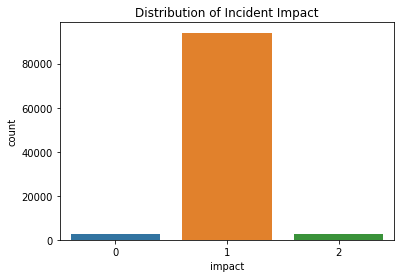

In [129]:
# Exploratory Data Analysis
sns.countplot(x=df['impact'])
plt.title('Distribution of Incident Impact')
plt.show()

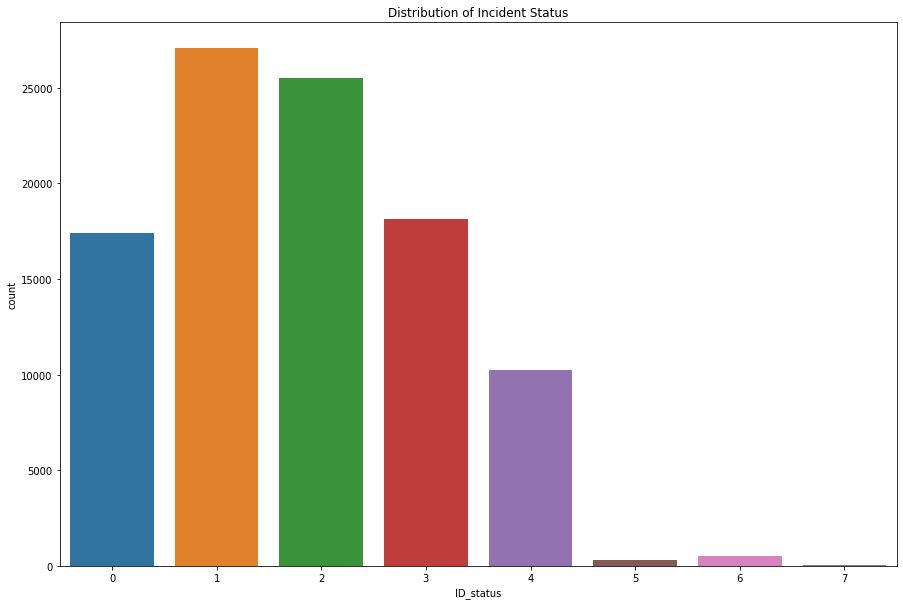

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['ID_status'])
plt.title('Distribution of Incident Status')
plt.show()

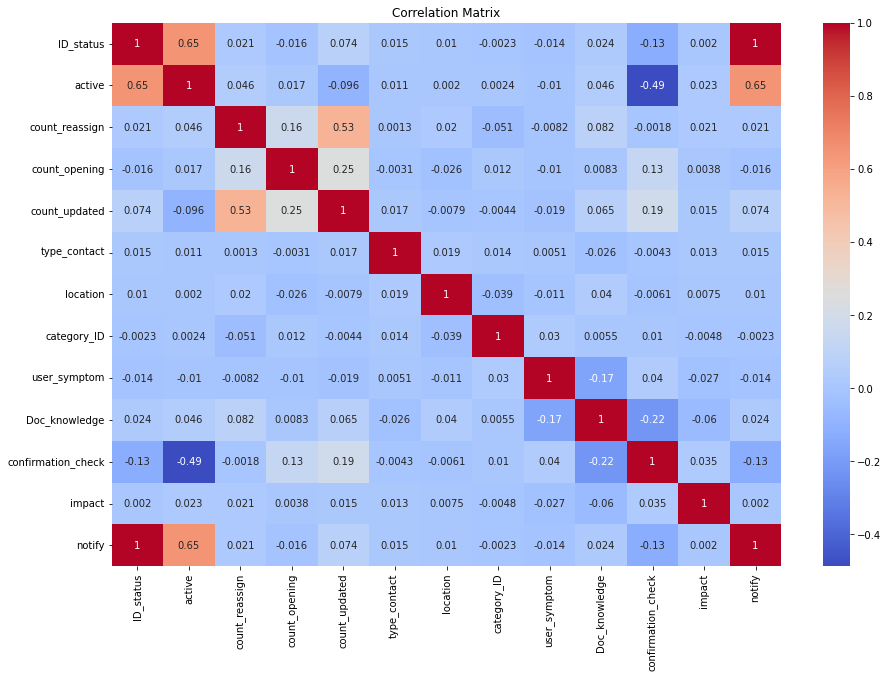

In [131]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [132]:
# Feature selection
X = df[['ID_status', 'active', 'count_reassign', 'count_opening', 'count_updated', 'type_contact', 'location', 'category_ID', 'user_symptom', 'Doc_knowledge', 'confirmation_check', 'notify']]
y = df['impact']

In [133]:
# Model selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_scores = cross_val_score(dtc, X_train, y_train, cv=10)
print('Decision Tree Classifier Accuracy:', np.mean(dtc_scores))

Decision Tree Classifier Accuracy: 0.9424618307518753


In [135]:
rfc = RandomForestClassifier(random_state=42)
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=10)
print('Random Forest Classifier Accuracy:', np.mean(rfc_scores))

Random Forest Classifier Accuracy: 0.953588865301746


In [136]:
# Model evaluation
models = [dtc,rfc]
model_names = ['Decision Tree Classifier','Random Forest Classifier']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_names[i], 'Evaluation Metrics:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', recall_score(y_test, y_pred, average='weighted'))
    print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\n\n')

Decision Tree Classifier Evaluation Metrics:
Accuracy: 0.9447076612903226
Precision: 0.9417737602262563
Recall: 0.9447076612903226
F1 Score: 0.9431208344149611
Confusion Matrix:
 [[  229   311     3]
 [  275 18319   209]
 [    9   290   195]]



Random Forest Classifier Evaluation Metrics:
Accuracy: 0.9515120967741936
Precision: 0.9394326471413817
Recall: 0.9515120967741936
F1 Score: 0.9409708981805598
Confusion Matrix:
 [[  121   420     2]
 [   88 18647    68]
 [    7   377   110]]



